In [1]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
macBoth_df = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/splits/macaqueMouse/macaqueToMouse_macaqueEnhancer_mouseEnhancer_val_bothIntersections.narrowPeak", sep="\t", header=None)

In [3]:
macBoth_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139
1,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20399,1000,.,2.72408,6.75342,4.72192,409
2,chr8,126497137,126497851,peak40056,-1,.,-1,-1,-1,543,chr8,126497646,126497998,peak20418,1000,.,5.85808,28.73361,26.25177,105
3,chr8,126514598,126514881,peak9815,-1,.,-1,-1,-1,148,chr8,126514588,126514919,peak20419,1000,.,5.57463,26.31845,23.86419,184
4,chr8,126517121,126517518,peak71325,-1,.,-1,-1,-1,194,chr8,126517154,126517515,peak20420,1000,.,10.58234,76.48757,73.65299,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19576,1000,.,2.26764,4.19389,2.37620,67
484,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19574,1000,.,15.21212,132.98932,129.90033,291
485,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19575,1000,.,2.64559,5.99242,4.00249,499
486,chr9,55110382,55110800,peak22968,-1,.,-1,-1,-1,264,chr9,55110510,55110799,peak20886,1000,.,8.22021,51.04268,48.36528,143


In [4]:
macBoth_noDup_df = macBoth_df.loc[macBoth_df.groupby(3)[16].idxmax()]

In [5]:
macBoth_noDup_df[macBoth_noDup_df[3] == "peak46218"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
484,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19574,1000,.,15.21212,132.98932,129.90033,291


In [6]:
macBoth_df[macBoth_df[13] == "peak19424"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
148,chr8,8992445,8993220,peak74659,-1,.,-1,-1,-1,270,chr8,8992509,8993074,peak19424,1000,.,6.5445,48.63282,45.97403,451
151,chr8,8992445,8993220,peak5261,-1,.,-1,-1,-1,506,chr8,8992509,8993074,peak19424,1000,.,6.5445,48.63282,45.97403,451


In [7]:
macBoth_df[macBoth_df[3].duplicated(keep=False)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139
1,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20399,1000,.,2.72408,6.75342,4.72192,409
12,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20428,921,.,5.94463,33.65896,31.12857,206
13,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20429,921,.,2.79605,7.53204,5.45378,495
14,chr8,126807358,126807991,peak62357,-1,.,-1,-1,-1,476,chr8,126807232,126807976,peak20428,921,.,5.94463,33.65896,31.12857,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19572,1000,.,4.69393,34.93824,32.39396,129
482,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19573,1000,.,17.47384,308.02618,304.42282,386
483,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19576,1000,.,2.26764,4.19389,2.37620,67
484,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19574,1000,.,15.21212,132.98932,129.90033,291


In [8]:
macBoth_noDup_df[13]

478    peak19586
179    peak21377
487    peak20442
30     peak20545
88     peak20807
         ...    
283    peak21035
3      peak20419
136    peak20693
126    peak20712
232    peak20290
Name: 13, Length: 331, dtype: object

In [9]:
bare_macBoth_noDup_df = macBoth_noDup_df.iloc[:, [0, 1, 2, 3, 10, 11, 12, 13]]

In [10]:
bare_macBoth_noDup_df 
# macaque peak | mouse peak

,0,1,2,3,10,11,12,13
478,chr8,26442957,26443370,peak10786,chr8,26443011,26443427,peak19586
179,chr9,118960392,118960956,peak10817,chr9,118960548,118960816,peak21377
487,chr8,127104674,127104970,peak11504,chr8,127104687,127104941,peak20442
30,chr9,14342207,14343449,peak11813,chr9,14342182,14342594,peak20545
88,chr9,40744266,40744581,peak12367,chr9,40744206,40744559,peak20807
...,...,...,...,...,...,...,...,...
283,chr9,78533226,78533651,peak97242,chr9,78533272,78533620,peak21035
3,chr8,126514598,126514881,peak9815,chr8,126514588,126514919,peak20419
136,chr9,29643197,29644143,peak98317,chr9,29643133,29643581,peak20693
126,chr9,30843859,30844729,peak99233,chr9,30844114,30844642,peak20712


In [11]:
bare_macBoth_noDup_df[bare_macBoth_noDup_df[3] == "peak35668"]

,0,1,2,3,10,11,12,13
0,chr8,123716952,123717765,peak35668,chr8,123717500,123717998,peak20398


In [12]:
bare_macBoth_noDup_df.to_csv("/home/azstephe/liverRegression/regression_liver/data/splits/macaqueMouse/macaqueOpen_mouseOpen_peaks_both_val.csv", index=False, sep="\t", header=False)

In [13]:
mouse_qn_df = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/splits/macaqueMouse/mouseOpen_macaqueOpen_val_qn.narrowPeak", header=None, sep='\t')

In [14]:
mouse_qn_df

,0,1,2,3,4
0,chr8,8733771,8734271,peak19418,2.695635
1,chr8,8992710,8993210,peak19424,2.192808
2,chr8,8994450,8994950,peak19426,1.972604
3,chr8,9227624,9228124,peak19431,3.129360
4,chr8,9348707,9349207,peak19435,2.597694
...,...,...,...,...,...
142,chr9,14246337,14246837,peak20544,2.465061
143,chr9,14342210,14342710,peak20545,2.289158
144,chr9,15681780,15682280,peak20565,3.104375
145,chr9,23249977,23250477,peak20592,3.036102


In [15]:
filtered = bare_macBoth_noDup_df [bare_macBoth_noDup_df [13].isin(mouse_qn_df[3])]

#filtered.to_csv("filtered_file1.txt", sep="\t", index=False, header=False)

In [16]:
filtered[filtered[13] == "peak19424"]

,0,1,2,3,10,11,12,13
151,chr8,8992445,8993220,peak5261,chr8,8992509,8993074,peak19424
148,chr8,8992445,8993220,peak74659,chr8,8992509,8993074,peak19424


In [17]:
macBoth_noDup_df = macBoth_noDup_df.drop_duplicates(subset=[13])

In [18]:
macBoth_noDup_df[macBoth_noDup_df[13] == 'peak19424']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
151,chr8,8992445,8993220,peak5261,-1,.,-1,-1,-1,506,chr8,8992509,8993074,peak19424,1000,.,6.5445,48.63282,45.97403,451


In [19]:
bare_macBoth_noDup_df = macBoth_noDup_df.iloc[:, [0, 1, 2, 3, 10, 11, 12, 13]]

In [20]:
bare_macBoth_noDup_df

,0,1,2,3,10,11,12,13
478,chr8,26442957,26443370,peak10786,chr8,26443011,26443427,peak19586
179,chr9,118960392,118960956,peak10817,chr9,118960548,118960816,peak21377
487,chr8,127104674,127104970,peak11504,chr8,127104687,127104941,peak20442
30,chr9,14342207,14343449,peak11813,chr9,14342182,14342594,peak20545
88,chr9,40744266,40744581,peak12367,chr9,40744206,40744559,peak20807
...,...,...,...,...,...,...,...,...
257,chr9,25454658,25455444,peak9438,chr9,25455078,25455425,peak20655
235,chr8,114555533,114555993,peak95654,chr8,114555590,114556154,peak20309
109,chr9,32672109,32672973,peak96492,chr9,32672086,32672846,peak20752
3,chr8,126514598,126514881,peak9815,chr8,126514588,126514919,peak20419


In [21]:
filtered = bare_macBoth_noDup_df [bare_macBoth_noDup_df [13].isin(mouse_qn_df[3])]

In [22]:
filtered

,0,1,2,3,10,11,12,13
478,chr8,26442957,26443370,peak10786,chr8,26443011,26443427,peak19586
487,chr8,127104674,127104970,peak11504,chr8,127104687,127104941,peak20442
30,chr9,14342207,14343449,peak11813,chr9,14342182,14342594,peak20545
153,chr8,9227809,9228163,peak12483,chr8,9227609,9228027,peak19431
28,chr9,15681902,15682188,peak12868,chr9,15681834,15682316,peak20565
...,...,...,...,...,...,...,...,...
155,chr8,9348623,9349013,peak85535,chr8,9348665,9349238,peak19435
33,chr9,14215387,14215964,peak8662,chr9,14215295,14215836,peak20541
235,chr8,114555533,114555993,peak95654,chr8,114555590,114556154,peak20309
3,chr8,126514598,126514881,peak9815,chr8,126514588,126514919,peak20419


In [23]:
mouse_qn_df

,0,1,2,3,4
0,chr8,8733771,8734271,peak19418,2.695635
1,chr8,8992710,8993210,peak19424,2.192808
2,chr8,8994450,8994950,peak19426,1.972604
3,chr8,9227624,9228124,peak19431,3.129360
4,chr8,9348707,9349207,peak19435,2.597694
...,...,...,...,...,...
142,chr9,14246337,14246837,peak20544,2.465061
143,chr9,14342210,14342710,peak20545,2.289158
144,chr9,15681780,15682280,peak20565,3.104375
145,chr9,23249977,23250477,peak20592,3.036102


In [24]:
filtered.sort_values(by=13)

,0,1,2,3,10,11,12,13
145,chr8,8733638,8734157,peak30058,chr8,8733751,8734148,peak19418
151,chr8,8992445,8993220,peak5261,chr8,8992509,8993074,peak19424
152,chr8,8994523,8994756,peak78336,chr8,8994503,8995163,peak19426
153,chr8,9227809,9228163,peak12483,chr8,9227609,9228027,peak19431
155,chr8,9348623,9349013,peak85535,chr8,9348665,9349238,peak19435
...,...,...,...,...,...,...,...,...
31,chr9,14246458,14246808,peak51578,chr9,14246443,14246744,peak20544
30,chr9,14342207,14343449,peak11813,chr9,14342182,14342594,peak20545
28,chr9,15681902,15682188,peak12868,chr9,15681834,15682316,peak20565
266,chr9,23250068,23250389,peak22576,chr9,23250023,23250520,peak20592


In [25]:
mac_qn_df = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/quantile_norm/macaque_liver_pos_ALL.bed", sep="\t", header=None)


In [26]:
mac_qn_df

,0,1,2,3,4
0,chr1,227138,227638,peak24046,2.565659
1,chr1,245240,245740,peak49485,2.126956
2,chr1,883200,883700,peak73240,1.887896
3,chr1,1326486,1326986,peak32882,2.314572
4,chr1,1383910,1384410,peak46008,2.105109
...,...,...,...,...,...
20610,chr4,61416970,61417470,peak47609,2.155190
20611,chr4,61540251,61540751,peak97260,1.441141
20612,chr4,61540661,61541161,peak20550,2.925606
20613,chr4,61685406,61685906,peak67279,1.942150


In [27]:
mac_filtered_df = mac_qn_df[mac_qn_df[3].isin(filtered[3])]

In [28]:
mac_filtered_df.sort_values(by=3)

,0,1,2,3,4
9072,chr14,87778039,87778539,peak11813,2.361054
12989,chr17,88914520,88915020,peak12483,2.970001
9050,chr14,85875371,85875871,peak12868,2.988658
2640,chr1,211365516,211366016,peak14712,2.975939
9098,chr14,88326075,88326575,peak16382,3.037615
...,...,...,...,...,...
12992,chr17,89074628,89075128,peak85535,1.788001
9081,chr14,87912216,87912716,peak8662,3.091566
17187,chr20,62740861,62741361,peak95654,1.421670
2569,chr1,210790503,210791003,peak9815,3.063008


In [29]:
filtered.sort_values(by=3)

,0,1,2,3,10,11,12,13
478,chr8,26442957,26443370,peak10786,chr8,26443011,26443427,peak19586
487,chr8,127104674,127104970,peak11504,chr8,127104687,127104941,peak20442
30,chr9,14342207,14343449,peak11813,chr9,14342182,14342594,peak20545
153,chr8,9227809,9228163,peak12483,chr8,9227609,9228027,peak19431
28,chr9,15681902,15682188,peak12868,chr9,15681834,15682316,peak20565
...,...,...,...,...,...,...,...,...
155,chr8,9348623,9349013,peak85535,chr8,9348665,9349238,peak19435
33,chr9,14215387,14215964,peak8662,chr9,14215295,14215836,peak20541
235,chr8,114555533,114555993,peak95654,chr8,114555590,114556154,peak20309
3,chr8,126514598,126514881,peak9815,chr8,126514588,126514919,peak20419


In [30]:
filtered

,0,1,2,3,10,11,12,13
478,chr8,26442957,26443370,peak10786,chr8,26443011,26443427,peak19586
487,chr8,127104674,127104970,peak11504,chr8,127104687,127104941,peak20442
30,chr9,14342207,14343449,peak11813,chr9,14342182,14342594,peak20545
153,chr8,9227809,9228163,peak12483,chr8,9227609,9228027,peak19431
28,chr9,15681902,15682188,peak12868,chr9,15681834,15682316,peak20565
...,...,...,...,...,...,...,...,...
155,chr8,9348623,9349013,peak85535,chr8,9348665,9349238,peak19435
33,chr9,14215387,14215964,peak8662,chr9,14215295,14215836,peak20541
235,chr8,114555533,114555993,peak95654,chr8,114555590,114556154,peak20309
3,chr8,126514598,126514881,peak9815,chr8,126514588,126514919,peak20419


In [31]:
mac_qn_df[mac_qn_df[3].isin(bare_macBoth_noDup_df[3])].sort_values(by=3)

,0,1,2,3,4
15414,chr2,104851297,104851797,peak10817,3.120019
9072,chr14,87778039,87778539,peak11813,2.361054
9412,chr14,115957197,115957697,peak12367,3.145658
12989,chr17,88914520,88915020,peak12483,2.970001
9050,chr14,85875371,85875871,peak12868,2.988658
...,...,...,...,...,...
18331,chr3,72626213,72626713,peak9438,2.829906
17187,chr20,62740861,62741361,peak95654,1.421670
9491,chr14,121333879,121334379,peak96492,1.281948
2569,chr1,210790503,210791003,peak9815,3.063008


In [32]:
mouse_qn_df[mouse_qn_df[3].isin(bare_macBoth_noDup_df[13])]

,0,1,2,3,4
0,chr8,8733771,8734271,peak19418,2.695635
1,chr8,8992710,8993210,peak19424,2.192808
2,chr8,8994450,8994950,peak19426,1.972604
3,chr8,9227624,9228124,peak19431,3.129360
4,chr8,9348707,9349207,peak19435,2.597694
...,...,...,...,...,...
142,chr9,14246337,14246837,peak20544,2.465061
143,chr9,14342210,14342710,peak20545,2.289158
144,chr9,15681780,15682280,peak20565,3.104375
145,chr9,23249977,23250477,peak20592,3.036102


In [33]:
bare_macBoth_noDup_df

,0,1,2,3,10,11,12,13
478,chr8,26442957,26443370,peak10786,chr8,26443011,26443427,peak19586
179,chr9,118960392,118960956,peak10817,chr9,118960548,118960816,peak21377
487,chr8,127104674,127104970,peak11504,chr8,127104687,127104941,peak20442
30,chr9,14342207,14343449,peak11813,chr9,14342182,14342594,peak20545
88,chr9,40744266,40744581,peak12367,chr9,40744206,40744559,peak20807
...,...,...,...,...,...,...,...,...
257,chr9,25454658,25455444,peak9438,chr9,25455078,25455425,peak20655
235,chr8,114555533,114555993,peak95654,chr8,114555590,114556154,peak20309
109,chr9,32672109,32672973,peak96492,chr9,32672086,32672846,peak20752
3,chr8,126514598,126514881,peak9815,chr8,126514588,126514919,peak20419


In [34]:
mac = mac_qn_df[mac_qn_df[3].isin(bare_macBoth_noDup_df[3])]
mouse = mouse_qn_df[mouse_qn_df[3].isin(bare_macBoth_noDup_df[13])]

bareMouse = bare_macBoth_noDup_df[bare_macBoth_noDup_df[13].isin(mouse[3])].sort_values(by=13)
final = bareMouse[bareMouse[3].isin(mac[3])].sort_values(by=3)
# final
mac_qn_df[mac_qn_df[3].isin(final[3])]
mouse_qn_df[mouse_qn_df[3].isin(final[13])]

,0,1,2,3,4
0,chr8,8733771,8734271,peak19418,2.695635
1,chr8,8992710,8993210,peak19424,2.192808
2,chr8,8994450,8994950,peak19426,1.972604
3,chr8,9227624,9228124,peak19431,3.129360
4,chr8,9348707,9349207,peak19435,2.597694
...,...,...,...,...,...
142,chr9,14246337,14246837,peak20544,2.465061
143,chr9,14342210,14342710,peak20545,2.289158
144,chr9,15681780,15682280,peak20565,3.104375
145,chr9,23249977,23250477,peak20592,3.036102


In [35]:
mac_qn_df[mac_qn_df[3].isin(bare_macBoth_noDup_df[3])].sort_values(by=3)

,0,1,2,3,4
15414,chr2,104851297,104851797,peak10817,3.120019
9072,chr14,87778039,87778539,peak11813,2.361054
9412,chr14,115957197,115957697,peak12367,3.145658
12989,chr17,88914520,88915020,peak12483,2.970001
9050,chr14,85875371,85875871,peak12868,2.988658
...,...,...,...,...,...
18331,chr3,72626213,72626713,peak9438,2.829906
17187,chr20,62740861,62741361,peak95654,1.421670
9491,chr14,121333879,121334379,peak96492,1.281948
2569,chr1,210790503,210791003,peak9815,3.063008


In [36]:
bare_macBoth_noDup_df[bare_macBoth_noDup_df[3]=='peak10817']

,0,1,2,3,10,11,12,13
179,chr9,118960392,118960956,peak10817,chr9,118960548,118960816,peak21377


In [37]:
mac_qn_df[mac_qn_df[3]=='peak12483']
mouse_qn_df[mouse_qn_df[3]=='peak19435']

,0,1,2,3,4
4,chr8,9348707,9349207,peak19435,2.597694


In [38]:
mouse_qn_df[mouse_qn_df[3].isin(final[13])].sort_values(by=3)

,0,1,2,3,4
0,chr8,8733771,8734271,peak19418,2.695635
1,chr8,8992710,8993210,peak19424,2.192808
2,chr8,8994450,8994950,peak19426,1.972604
3,chr8,9227624,9228124,peak19431,3.129360
4,chr8,9348707,9349207,peak19435,2.597694
...,...,...,...,...,...
142,chr9,14246337,14246837,peak20544,2.465061
143,chr9,14342210,14342710,peak20545,2.289158
144,chr9,15681780,15682280,peak20565,3.104375
145,chr9,23249977,23250477,peak20592,3.036102


In [39]:
mac_qn_df[mac_qn_df[3].isin(final[3])].sort_values(by=3)

,0,1,2,3,4
9072,chr14,87778039,87778539,peak11813,2.361054
12989,chr17,88914520,88915020,peak12483,2.970001
9050,chr14,85875371,85875871,peak12868,2.988658
2640,chr1,211365516,211366016,peak14712,2.975939
9098,chr14,88326075,88326575,peak16382,3.037615
...,...,...,...,...,...
12992,chr17,89074628,89075128,peak85535,1.788001
9081,chr14,87912216,87912716,peak8662,3.091566
17187,chr20,62740861,62741361,peak95654,1.421670
2569,chr1,210790503,210791003,peak9815,3.063008


In [40]:
final.sort_values(by=13)

,0,1,2,3,10,11,12,13
145,chr8,8733638,8734157,peak30058,chr8,8733751,8734148,peak19418
151,chr8,8992445,8993220,peak5261,chr8,8992509,8993074,peak19424
152,chr8,8994523,8994756,peak78336,chr8,8994503,8995163,peak19426
153,chr8,9227809,9228163,peak12483,chr8,9227609,9228027,peak19431
155,chr8,9348623,9349013,peak85535,chr8,9348665,9349238,peak19435
...,...,...,...,...,...,...,...,...
31,chr9,14246458,14246808,peak51578,chr9,14246443,14246744,peak20544
30,chr9,14342207,14343449,peak11813,chr9,14342182,14342594,peak20545
28,chr9,15681902,15682188,peak12868,chr9,15681834,15682316,peak20565
266,chr9,23250068,23250389,peak22576,chr9,23250023,23250520,peak20592


In [41]:
pred_df = pd.read_csv('../model_outputs/r0p9r0em/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.DataFrame(np.zeros(val1_len*2))
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

In [42]:
doubled_combined

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1089,3.469201
1090,3.494095
1091,3.494095
1092,3.527422


In [43]:
pred_df

,0
0,0.371309
1,1.097851
2,0.160640
3,0.142823
4,0.476823
...,...
16117,1.736645
16118,2.120899
16119,2.255533
16120,1.850506


In [44]:
macBoth_df = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/splits/macaqueMouse/macaqueToMouse_liver_macaqueEnhancer_mouseEnhancer_val_wawb.narrowPeak", sep="\t", header=None)

In [45]:
macBoth_df[macBoth_df[3]=='peak57495']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
16,chr8,126824543,126825031,peak57495,-1,.,-1,-1,-1,266,chr8,126824525,126825188,peak20432,1000,.,3.11801,8.56829,6.44560,93
17,chr8,126824543,126825031,peak57495,-1,.,-1,-1,-1,266,chr8,126824525,126825188,peak20431,1000,.,6.61796,38.65833,36.08059,314


In [46]:
df = macBoth_df
mac_qn=pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/macaque_liver_pos_ALL.bed", sep="\t", header=None)

In [47]:
unique = df[~df.duplicated(subset=[0, 1], keep=False)]
duplicates = df[df.duplicated(subset=[1, 2], keep=False)]

In [48]:
duplicates

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139
1,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20399,1000,.,2.72408,6.75342,4.72192,409
7,chr8,126666196,126667391,peak23956,-1,.,-1,-1,-1,316,chr8,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283
8,chr8,126666196,126667391,peak67267,-1,.,-1,-1,-1,814,chr8,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283
9,chr8,126666196,126667391,peak47934,-1,.,-1,-1,-1,1012,chr8,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19572,1000,.,4.69393,34.93824,32.39396,129
482,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19573,1000,.,17.47384,308.02618,304.42282,386
483,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19576,1000,.,2.26764,4.19389,2.37620,67
484,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19574,1000,.,15.21212,132.98932,129.90033,291


In [49]:
grouped_dups = duplicates.groupby([1, 2])[3].apply(list).reset_index(name='col3')

def collapse_if_identical(lst):
    return lst[0] if all(x == lst[0] for x in lst) else lst

grouped_dups['col3'] = grouped_dups['col3'].apply(collapse_if_identical)


In [50]:
grouped_dups

,1,2,col3
0,6668262,6668828,peak24458
1,7603389,7603594,peak64793
2,7914492,7914988,peak729
3,8733638,8734157,peak30058
4,8992445,8993220,"[peak74659, peak74659, peak74659, peak5261, pe..."
...,...,...,...
118,126666196,126667391,"[peak23956, peak67267, peak47934]"
119,126807358,126807991,"[peak39634, peak39634, peak62357, peak62357]"
120,126824543,126825031,peak57495
121,126838305,126839235,"[peak50766, peak63444]"


In [51]:
def keep_largest_signal(lst):
    if isinstance(lst, list):
        maxPeakName = ''
        maxPeakStrength = 0
        for i in range(len(lst)):
            peak = lst[i]
            matching_rows = mac_qn[mac_qn[3] == peak]
            if not matching_rows.empty:
                signal = matching_rows[4].iloc[0]
                if signal > maxPeakStrength:
                    maxPeakStrength = signal
                    maxPeakName = peak
        return maxPeakName
    else: 
        return lst


grouped_dups['col3'] = grouped_dups['col3'].apply(keep_largest_signal)
grouped_dups = grouped_dups[grouped_dups['col3'] != '']

keep_strongestcol3 = df.merge(grouped_dups[['col3']], left_on=3, right_on='col3', how='inner').drop('col3', axis=1)

In [52]:
duplicates.merge(grouped_dups[['col3']], left_on=3, right_on='col3', how='inner').drop('col3', axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139
1,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20399,1000,.,2.72408,6.75342,4.72192,409
2,chr8,126666196,126667391,peak23956,-1,.,-1,-1,-1,316,chr8,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283
3,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20428,921,.,5.94463,33.65896,31.12857,206
4,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20429,921,.,2.79605,7.53204,5.45378,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19572,1000,.,4.69393,34.93824,32.39396,129
222,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19573,1000,.,17.47384,308.02618,304.42282,386
223,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19576,1000,.,2.26764,4.19389,2.37620,67
224,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19574,1000,.,15.21212,132.98932,129.90033,291


In [53]:
keep_strongestcol3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139
1,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20399,1000,.,2.72408,6.75342,4.72192,409
2,chr8,126666196,126667391,peak23956,-1,.,-1,-1,-1,316,chr8,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283
3,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20428,921,.,5.94463,33.65896,31.12857,206
4,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20429,921,.,2.79605,7.53204,5.45378,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19572,1000,.,4.69393,34.93824,32.39396,129
222,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19573,1000,.,17.47384,308.02618,304.42282,386
223,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19576,1000,.,2.26764,4.19389,2.37620,67
224,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19574,1000,.,15.21212,132.98932,129.90033,291


In [54]:
keep_strongestcol3[keep_strongestcol3[1] == 126666196]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2,chr8,126666196,126667391,peak23956,-1,.,-1,-1,-1,316,chr8,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283


In [55]:
col13_dups = keep_strongestcol3.groupby([11, 12])[13].apply(list).reset_index(name='col13')
col13_dups



,11,12,col13
0,6668246,6669123,"[peak20464, peak20465, peak20466]"
1,7603184,7603794,"[peak20478, peak20479]"
2,7914173,7914971,"[peak20485, peak20484]"
3,8733751,8734148,"[peak19419, peak19418]"
4,8992509,8993074,"[peak19425, peak19423, peak19424]"
...,...,...,...
110,120601586,120602474,"[peak21380, peak21381, peak21382]"
111,123717500,123717998,"[peak20398, peak20399]"
112,126666351,126667011,[peak20423]
113,126807232,126807976,"[peak20428, peak20429]"


In [56]:
col13_dups['col13'] = col13_dups['col13'].apply(collapse_if_identical)

def keep_largest_signal(lst, qn_df):
    if isinstance(lst, list):
        maxPeakName = ''
        maxPeakStrength = 0
        for peak in lst:
            matching_rows = qn_df[qn_df[3] == peak]
            if not matching_rows.empty:
                signal = matching_rows[4].iloc[0]
                if signal > maxPeakStrength:
                    maxPeakStrength = signal
                    maxPeakName = peak
        return maxPeakName
    else: 
        return lst

qn_df = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/mouse_liver_pos_ALL.bed", sep="\t", header=None)
        
col13_dups['col13'] = col13_dups['col13'].apply(lambda x: keep_largest_signal(x, qn_df))
col13_dups = col13_dups[col13_dups['col13'] != '']
col13_dups

,11,12,col13
0,6668246,6669123,peak20464
1,7603184,7603794,peak20478
2,7914173,7914971,peak20484
3,8733751,8734148,peak19418
4,8992509,8993074,peak19424
...,...,...,...
110,120601586,120602474,peak21381
111,123717500,123717998,peak20398
112,126666351,126667011,peak20423
113,126807232,126807976,peak20428


In [57]:
keep_strongestcol13 = keep_strongestcol3.merge(col13_dups[['col13']], left_on=13, right_on='col13', how='inner').drop('col13', axis=1)

In [58]:
keep_strongestcol13

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139
1,chr8,126666196,126667391,peak23956,-1,.,-1,-1,-1,316,chr8,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283
2,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20428,921,.,5.94463,33.65896,31.12857,206
3,chr8,126824543,126825031,peak57495,-1,.,-1,-1,-1,266,chr8,126824525,126825188,peak20431,1000,.,6.61796,38.65833,36.08059,314
4,chr9,14342207,14343449,peak4429,-1,.,-1,-1,-1,953,chr9,14342182,14342594,peak20545,1000,.,7.46433,43.51744,40.89712,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,chr8,31520414,31521367,peak2329,-1,.,-1,-1,-1,649,chr8,31520546,31521390,peak19631,1000,.,17.54175,495.59286,491.56726,507
112,chr8,30923846,30924106,peak43347,-1,.,-1,-1,-1,82,chr8,30923482,30924324,peak19618,1000,.,14.29984,170.58379,167.36131,446
113,chr8,26878873,26879058,peak37913,-1,.,-1,-1,-1,59,chr8,26878634,26879040,peak19590,560,.,4.92336,21.33293,18.94510,108
114,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19573,1000,.,17.47384,308.02618,304.42282,386


In [59]:
still_dups_col3 = keep_strongestcol13[keep_strongestcol13.duplicated(subset=[3], keep=False)]
still_dups_col3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
58,chr9,78526186,78528318,peak43729,-1,.,-1,-1,-1,198,chr9,78527261,78527700,peak21030,1000,.,11.90393,122.32232,119.27561,159
59,chr9,78526186,78528318,peak43729,-1,.,-1,-1,-1,198,chr9,78527990,78528434,peak21031,1000,.,5.79117,43.42151,40.80415,316
87,chr9,74324171,74325025,peak37289,-1,.,-1,-1,-1,205,chr9,74324061,74324605,peak20968,928,.,5.28634,25.43824,22.99797,239
88,chr9,74324171,74325025,peak37289,-1,.,-1,-1,-1,205,chr9,74324794,74325264,peak20970,608,.,3.88266,14.44384,12.17062,340


In [60]:
still_dcol3 = still_dups_col3.groupby(3)[13].apply(list).reset_index(name='col13')
still_dcol3

,3,col13
0,peak37289,"[peak20968, peak20970]"
1,peak43729,"[peak21030, peak21031]"


In [61]:
def overlap(start1, end1, start2, end2):
    return max(0, min(end1, end2)-max(start1, start2))

def get_biggest_overlap(lst, col, df):
    maxOverlap = 0
    maxPeakOverlap = ""
    for peak in lst:
        row = df[df[col] == peak].iloc[0] #iloc bc possible to return multiple rows (never will based on th
        overlap = max(0, min(row[2], row[12])-max(row[1], row[11]))
        if overlap > maxOverlap:
            maxOverlap = overlap
            maxPeakOverlap = peak
    return peak

still_dcol3['col13'] = still_dcol3['col13'].apply(lambda x: get_biggest_overlap(x, 13, still_dups_col3))
still_dcol3
# df['overlap'] = df.apply(
#     lambda row: max(0, min(row[2], row[12]) - max(row[1], row[11])),
#     axis=1
# )

# # Keep the row with the greatest overlap
# result = df.loc[df['overlap'].idxmax()]


,3,col13
0,peak37289,peak20970
1,peak43729,peak21031


In [62]:
merged = still_dups_col3.merge(still_dcol3[[3, 'col13']], left_on=[3, 13], right_on=[3, 'col13'], how='left', indicator=True)
merged

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,col13,_merge
0,chr9,78526186,78528318,peak43729,-1,.,-1,-1,-1,198,...,78527700,peak21030,1000,.,11.90393,122.32232,119.27561,159,NaN,left_only
1,chr9,78526186,78528318,peak43729,-1,.,-1,-1,-1,198,...,78528434,peak21031,1000,.,5.79117,43.42151,40.80415,316,peak21031,both
2,chr9,74324171,74325025,peak37289,-1,.,-1,-1,-1,205,...,74324605,peak20968,928,.,5.28634,25.43824,22.99797,239,NaN,left_only
3,chr9,74324171,74325025,peak37289,-1,.,-1,-1,-1,205,...,74325264,peak20970,608,.,3.88266,14.44384,12.17062,340,peak20970,both


In [63]:
m13 = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])
m13

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,col13
0,chr9,78526186,78528318,peak43729,-1,.,-1,-1,-1,198,...,78527261,78527700,peak21030,1000,.,11.90393,122.32232,119.27561,159,NaN
2,chr9,74324171,74325025,peak37289,-1,.,-1,-1,-1,205,...,74324061,74324605,peak20968,928,.,5.28634,25.43824,22.99797,239,NaN


In [64]:
keep_strongestcol13_subset = keep_strongestcol13.iloc[:,:20]
m13_subset = m13.iloc[:,:20]
test3 = keep_strongestcol13[~keep_strongestcol13_subset.apply(tuple, axis=1).isin(m13_subset.apply(tuple, axis=1))]
test3[test3.duplicated(subset=[13], keep=False)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
84,chr8,46686893,46687533,peak16165,-1,.,-1,-1,-1,105,chr8,46686630,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374
85,chr8,46686599,46686893,peak22082,-1,.,-1,-1,-1,138,chr8,46686630,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374


In [65]:
unique3 = keep_strongestcol13.merge(m13[[3, 13]], left_on=[3, 13], right_on=[3, 13], how='left', indicator=True)
unique3

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,_merge
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,...,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139,left_only
1,chr8,126666196,126667391,peak23956,-1,.,-1,-1,-1,316,...,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283,left_only
2,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,...,126807232,126807976,peak20428,921,.,5.94463,33.65896,31.12857,206,left_only
3,chr8,126824543,126825031,peak57495,-1,.,-1,-1,-1,266,...,126824525,126825188,peak20431,1000,.,6.61796,38.65833,36.08059,314,left_only
4,chr9,14342207,14343449,peak4429,-1,.,-1,-1,-1,953,...,14342182,14342594,peak20545,1000,.,7.46433,43.51744,40.89712,278,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,chr8,31520414,31521367,peak2329,-1,.,-1,-1,-1,649,...,31520546,31521390,peak19631,1000,.,17.54175,495.59286,491.56726,507,left_only
112,chr8,30923846,30924106,peak43347,-1,.,-1,-1,-1,82,...,30923482,30924324,peak19618,1000,.,14.29984,170.58379,167.36131,446,left_only
113,chr8,26878873,26879058,peak37913,-1,.,-1,-1,-1,59,...,26878634,26879040,peak19590,560,.,4.92336,21.33293,18.94510,108,left_only
114,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,...,23477576,23478167,peak19573,1000,.,17.47384,308.02618,304.42282,386,left_only


In [66]:
u3 = unique3[unique3['_merge'] == 'left_only'].drop(columns=['_merge'])
u3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139
1,chr8,126666196,126667391,peak23956,-1,.,-1,-1,-1,316,chr8,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283
2,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20428,921,.,5.94463,33.65896,31.12857,206
3,chr8,126824543,126825031,peak57495,-1,.,-1,-1,-1,266,chr8,126824525,126825188,peak20431,1000,.,6.61796,38.65833,36.08059,314
4,chr9,14342207,14343449,peak4429,-1,.,-1,-1,-1,953,chr9,14342182,14342594,peak20545,1000,.,7.46433,43.51744,40.89712,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,chr8,31520414,31521367,peak2329,-1,.,-1,-1,-1,649,chr8,31520546,31521390,peak19631,1000,.,17.54175,495.59286,491.56726,507
112,chr8,30923846,30924106,peak43347,-1,.,-1,-1,-1,82,chr8,30923482,30924324,peak19618,1000,.,14.29984,170.58379,167.36131,446
113,chr8,26878873,26879058,peak37913,-1,.,-1,-1,-1,59,chr8,26878634,26879040,peak19590,560,.,4.92336,21.33293,18.94510,108
114,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19573,1000,.,17.47384,308.02618,304.42282,386


In [67]:
pd.concat([test3, u3]).drop_duplicates(keep=False)

/home/azstephe/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:6248: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  diff = Index(subset).difference(self.columns)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19


In [68]:
still_dups_col13 = u3[u3.duplicated(subset=[13], keep=False)]
still_dups_col13

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
84,chr8,46686893,46687533,peak16165,-1,.,-1,-1,-1,105,chr8,46686630,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374
85,chr8,46686599,46686893,peak22082,-1,.,-1,-1,-1,138,chr8,46686630,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374


In [69]:
still_dcol13 = still_dups_col13.groupby(13)[3].apply(list).reset_index(name='col3')
still_dcol13

,13,col3
0,peak19794,"[peak16165, peak22082]"


In [70]:
def get_biggest_overlap(lst, col, df):
    maxOverlap = 0
    maxPeakOverlap = ""
    for peak in lst:
        row = df[df[col] == peak].iloc[0] #iloc bc possible to return multiple rows (never will based on th
        overlap = max(0, min(row[2], row[12])-max(row[1], row[11]))
        if overlap > maxOverlap:
            maxOverlap = overlap
            maxPeakOverlap = peak
    return peak

still_dcol13['col3'] = still_dcol13['col3'].apply(lambda x: get_biggest_overlap(x, 3, still_dups_col13))
still_dcol13

,13,col3
0,peak19794,peak22082


In [71]:
merged13 = still_dups_col13.merge(still_dcol13[[13, 'col3']], left_on=[3, 13], right_on=['col3', 13], how='left', indicator=True)
merged13

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,col3,_merge
0,chr8,46686893,46687533,peak16165,-1,.,-1,-1,-1,105,...,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374,NaN,left_only
1,chr8,46686599,46686893,peak22082,-1,.,-1,-1,-1,138,...,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374,peak22082,both


In [72]:
m13 = merged13[merged13['_merge'] == 'left_only'].drop(columns=['_merge'])
m13

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,col3
0,chr8,46686893,46687533,peak16165,-1,.,-1,-1,-1,105,...,46686630,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374,NaN


In [73]:
u3_subset = u3.iloc[:, :19]
m13_subset = m13.iloc[:, :19]

# Identify rows in `u3` that are NOT in `m13`
u3_filtered = u3[~u3_subset.apply(tuple, axis=1).isin(m13_subset.apply(tuple, axis=1))]
u3_filtered
# unique13 = u3.merge(m13[[13, 'col3']], left_on=[3,13], right_on=['col3', 13], how='left', indicator=True)
# u3_filtered[u3_filtered[13] == 'peak19794']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139
1,chr8,126666196,126667391,peak23956,-1,.,-1,-1,-1,316,chr8,126666351,126667011,peak20423,1000,.,9.54907,79.76866,76.91652,283
2,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20428,921,.,5.94463,33.65896,31.12857,206
3,chr8,126824543,126825031,peak57495,-1,.,-1,-1,-1,266,chr8,126824525,126825188,peak20431,1000,.,6.61796,38.65833,36.08059,314
4,chr9,14342207,14343449,peak4429,-1,.,-1,-1,-1,953,chr9,14342182,14342594,peak20545,1000,.,7.46433,43.51744,40.89712,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,chr8,31520414,31521367,peak2329,-1,.,-1,-1,-1,649,chr8,31520546,31521390,peak19631,1000,.,17.54175,495.59286,491.56726,507
112,chr8,30923846,30924106,peak43347,-1,.,-1,-1,-1,82,chr8,30923482,30924324,peak19618,1000,.,14.29984,170.58379,167.36131,446
113,chr8,26878873,26879058,peak37913,-1,.,-1,-1,-1,59,chr8,26878634,26879040,peak19590,560,.,4.92336,21.33293,18.94510,108
114,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19573,1000,.,17.47384,308.02618,304.42282,386


In [74]:
both_df = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/splits/macaqueMouse/macaqueToMouse_liver_macaqueEnhancer_mouseEnhancer_val_wawb.narrowPeak", sep="\t", header=None)
mac_qn = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/macaque_liver_pos_ALL.bed", sep="\t", header=None)
mouse_qn = pd.read_csv("/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/mouse_liver_pos_ALL.bed", sep="\t", header=None)

unique1_2 = both_df[~both_df.duplicated(subset=[1, 2], keep=False)] # entries with unique mac mapped to mouse start and end
all_unique = unique1_2[~unique1_2.duplicated(subset=[11,12], keep=False)]

#### FUNCTIONS

def collapse_if_identical(lst):
    return lst[0] if all(x == lst[0] for x in lst) else lst
    

# takes in list and returns peak with largest signal
def keep_largest_signal(lst, qn_df):
    if isinstance(lst, list):
        maxPeakName = ''
        maxPeakStrength = 0
        for peak in lst:
            matching_rows = qn_df[qn_df[3] == peak]
            if not matching_rows.empty:
                signal = matching_rows[4].iloc[0]
                if signal > maxPeakStrength:
                    maxPeakStrength = signal
                    maxPeakName = peak
        return maxPeakName
    else: 
        return lst

# def overlap(start1, end1, start2, end2):
#     return max(0, min(end1, end2)-max(start1, start2))

def get_biggest_overlap(lst, col, df):
    maxOverlap = 0
    maxPeakOverlap = ""
    for peak in lst:
        row = df[df[col] == peak].iloc[0] #iloc bc possible to return multiple rows (never will based on th
        overlap = max(0, min(row[2], row[12])-max(row[1], row[11]))
        if overlap > maxOverlap:
            maxOverlap = overlap
            maxPeakOverlap = peak
    return peak

#### COL1,2 DUPLICATES

duplicates3 = both_df[both_df.duplicated(subset=[1, 2], keep=False)] # entries with duplicated mac mapped to mouse start and end 
grouped_dups3 = duplicates3.groupby([1, 2])[3].apply(list).reset_index(name='col3')

# grouped dups: start | end | [peaks with these endpoints]
grouped_dups3['col3'] = grouped_dups3['col3'].apply(collapse_if_identical) 

grouped_dups3['col3'] = grouped_dups3['col3'].apply(lambda x: keep_largest_signal(x, mac_qn)) # redundant endpoints now map to 1 peak in col3
grouped_dups3 = grouped_dups3[grouped_dups3['col3'] != ''] # remove macaque peaks that aren't large enough (largest 20615)

# df of duplicated col1,2 with strongest peak
keep_strongestcol3 = duplicates3.merge(grouped_dups3[['col3']], left_on=3, right_on='col3', how='inner').drop('col3', axis=1) # keeps the strongest signal in col3 for redundant endpoints

#### COL11,12 DUPLICATES

grouped_dups13 = keep_strongestcol3.groupby([11, 12])[13].apply(list).reset_index(name='col13')
grouped_dups13['col13'] = grouped_dups13['col13'].apply(collapse_if_identical)

grouped_dups13['col13'] = grouped_dups13['col13'].apply(lambda x: keep_largest_signal(x, mouse_qn))
grouped_dups13 = grouped_dups13[grouped_dups13['col13'] != '']

keep_strongestcol13 = keep_strongestcol3.merge(grouped_dups13[['col13']], left_on=13, right_on='col13', how='inner').drop('col13', axis=1)

unique_endpoints = keep_strongestcol13 #rows with unique endpoints from the duplicated endpoints set

####

# col3 peakname duplicates with different endpoints
still_dups_col3 = unique_endpoints[unique_endpoints.duplicated(subset=[3], keep=False)]

# col3peaks | [col13 peaks intersecting col3 peak]
grouped_dcol3 = still_dups_col3.groupby(3)[13].apply(list).reset_index(name='col13')

# get the col13 peak with most overlap of col3
grouped_dcol3['col13'] = grouped_dcol3['col13'].apply(lambda x: get_biggest_overlap(x, 13, still_dups_col3))

merged3 = still_dups_col3.merge(grouped_dcol3[[3, 'col13']], left_on=[3, 13], right_on=[3, 'col13'], how='left', indicator=True)

remove3 = merged3[merged3['_merge'] == 'left_only'].drop(columns=['_merge']) # col13 is what we want to remove

unique_endpoints_subset = unique_endpoints.iloc[:,:20]
remove3_subset = remove3.iloc[:,:20]

# all col3 entries unique
unique3 = unique_endpoints[~unique_endpoints_subset.apply(tuple, axis=1).isin(remove3_subset.apply(tuple, axis=1))] 

####

# col13 peakname duplicates with different endpoints
still_dups_col13 = unique3[unique3.duplicated(subset=[13], keep=False)]

# col13peaks | [col3 peaks intersecting col13 peak]
grouped_dcol13 = still_dups_col13.groupby(13)[3].apply(list).reset_index(name='col3')

# get the col3 peak with most overlap of col13
grouped_dcol13['col3'] = grouped_dcol13['col3'].apply(lambda x: get_biggest_overlap(x, 3, still_dups_col13))

merged13 = still_dups_col13.merge(grouped_dcol13[[13, 'col3']], left_on=[3, 13], right_on=['col3', 13], how='left', indicator=True)

remove13 = merged13[merged13['_merge'] == 'left_only'].drop(columns=['_merge'])

unique3_subset = unique3.iloc[:, :20]
remove13_subset = remove13.iloc[:, :20]

# Identify rows in u3 that are NOT in remove3
filtered_peaks_unique = unique3[~unique3_subset.apply(tuple, axis=1).isin(remove13_subset.apply(tuple, axis=1))]

# one_to_one_peaks = pd.concat(all_unique, filtered_peaks_unique)

full_unique = pd.concat([all_unique, filtered_peaks_unique])

# Sort by column '1'
one_to_one_peaks = full_unique.sort_values(by=1).reset_index(drop=True)
one_to_one_peaks

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr9,6668262,6668828,peak24458,-1,.,-1,-1,-1,370,chr9,6668246,6669123,peak20464,1000,.,10.41801,106.98440,104.00175,372
1,chr9,7603389,7603594,peak64793,-1,.,-1,-1,-1,114,chr9,7603184,7603794,peak20478,1000,.,18.10567,247.44370,243.99432,315
2,chr9,7914492,7914988,peak729,-1,.,-1,-1,-1,141,chr9,7914173,7914971,peak20484,1000,.,15.21739,160.17427,156.98676,531
3,chr8,8733638,8734157,peak30058,-1,.,-1,-1,-1,379,chr8,8733751,8734148,peak19418,1000,.,12.36603,110.58308,107.58508,270
4,chr8,8992445,8993220,peak5261,-1,.,-1,-1,-1,506,chr8,8992509,8993074,peak19424,1000,.,6.54450,48.63282,45.97403,451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,chr8,126774794,126775271,peak24665,-1,.,-1,-1,-1,309,chr8,126774776,126775173,peak20427,884,.,5.10220,22.43992,20.03460,168
247,chr8,126807358,126807991,peak39634,-1,.,-1,-1,-1,136,chr8,126807232,126807976,peak20428,921,.,5.94463,33.65896,31.12857,206
248,chr8,126824543,126825031,peak57495,-1,.,-1,-1,-1,266,chr8,126824525,126825188,peak20431,1000,.,6.61796,38.65833,36.08059,314
249,chr8,126920866,126921347,peak14712,-1,.,-1,-1,-1,189,chr8,126920865,126921188,peak20441,1000,.,6.42499,33.74764,31.21361,172


In [75]:
pd.concat([filtered_peaks_unique, u3_filtered]).drop_duplicates(keep=False)

/home/azstephe/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:6248: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  diff = Index(subset).difference(self.columns)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19


In [76]:
s = both_df.drop_duplicates(subset = [3], keep='first')
s.drop_duplicates(subset = [13], keep='first')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chr8,123716952,123717765,peak35668,-1,.,-1,-1,-1,688,chr8,123717500,123717998,peak20398,1000,.,10.84927,84.12369,81.24886,139
2,chr8,126497137,126497851,peak40056,-1,.,-1,-1,-1,543,chr8,126497646,126497998,peak20418,1000,.,5.85808,28.73361,26.25177,105
3,chr8,126514598,126514881,peak9815,-1,.,-1,-1,-1,148,chr8,126514588,126514919,peak20419,1000,.,5.57463,26.31845,23.86419,184
4,chr8,126517121,126517518,peak71325,-1,.,-1,-1,-1,194,chr8,126517154,126517515,peak20420,1000,.,10.58234,76.48757,73.65299,184
5,chr8,126614137,126614741,peak68976,-1,.,-1,-1,-1,385,chr8,126614106,126614594,peak20421,1000,.,8.03124,49.13050,46.46696,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,chr8,26442957,26443370,peak10786,-1,.,-1,-1,-1,223,chr8,26443011,26443427,peak19586,1000,.,8.97609,58.88509,56.15444,293
479,chr8,26878873,26879058,peak37913,-1,.,-1,-1,-1,59,chr8,26878634,26879040,peak19590,560,.,4.92336,21.33293,18.94510,108
481,chr8,23477377,23477872,peak3179,-1,.,-1,-1,-1,219,chr8,23477576,23478167,peak19572,1000,.,4.69393,34.93824,32.39396,129
483,chr8,23596282,23596579,peak46218,-1,.,-1,-1,-1,154,chr8,23596152,23596735,peak19576,1000,.,2.26764,4.19389,2.37620,67


In [77]:
remove13

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,col3
0,chr8,46686893,46687533,peak16165,-1,.,-1,-1,-1,105,...,46686630,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374,NaN


In [78]:
unique3[unique3[1] == 46686893]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
84,chr8,46686893,46687533,peak16165,-1,.,-1,-1,-1,105,chr8,46686630,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374


In [79]:
filtered_peaks_unique[filtered_peaks_unique[13] == 'peak19794']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
85,chr8,46686599,46686893,peak22082,-1,.,-1,-1,-1,138,chr8,46686630,46687387,peak19794,1000,.,15.84507,186.67757,183.40315,374


In [80]:
one_to_one_peaks[one_to_one_peaks.duplicated(subset=[3], keep=False)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19


In [81]:
real_qn_mouse = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/mouse_liver_pos_ALL.bed', header=None, sep='\t')
real_qn_mac = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/macaque_liver_pos_ALL.bed', header=None, sep='\t')
peaks = one_to_one_peaks[[3, 13]]
peaks

,3,13
0,peak24458,peak20464
1,peak64793,peak20478
2,peak729,peak20484
3,peak30058,peak19418
4,peak5261,peak19424
...,...,...
246,peak24665,peak20427
247,peak39634,peak20428
248,peak57495,peak20431
249,peak14712,peak20441


In [82]:
real_qn_mouse

,0,1,2,3,4
0,chr10,121705418,121705918,peak3449,1.489948
1,chr10,126869381,126869881,peak3542,1.588213
2,chr10,24463512,24464012,peak2339,1.587897
3,chr10,28271642,28272142,peak2403,1.587739
4,chr10,3565361,3565861,peak1981,1.586948
...,...,...,...,...,...
20610,chr6,59712958,59713458,peak17761,3.742486
20611,chr5,19522167,19522667,peak16255,3.764595
20612,chr8,20549919,20550419,peak19552,3.791635
20613,chrX,143482815,143483315,peak21917,3.840370


In [83]:
merged_df = peaks.merge(real_qn_mac, how='left', left_on=3, right_on=3, suffixes=('', '_mac'))

# Merge the result with df3 on col13 and df3['col3']
merged_df = merged_df.merge(real_qn_mouse, how='left', left_on=13, right_on=3, suffixes=('_mac', '_mouse'))


# Subtract col4 values from df2 and df3
merged_df['result'] = merged_df['4_mac'] - merged_df['4_mouse']
res = merged_df[['3_mac', 13, '4_mac', '4_mouse', 'result']]
res
# # Drop unnecessary columns (optional)
# final_df = merged_df[['col3', 'col13', 'result']]

,3_mac,13,4_mac,4_mouse,result
0,peak24458,peak20464,2.599997,2.585922,0.014075
1,peak64793,peak20478,1.832866,3.056738,-1.223872
2,peak729,peak20484,3.341600,2.898484,0.443116
3,peak30058,peak19418,2.354561,2.725534,-0.370973
4,peak5261,peak19424,3.128443,2.241024,0.887419
...,...,...,...,...,...
246,peak24665,peak20427,2.175861,2.067716,0.108145
247,peak39634,peak20428,1.862402,2.167768,-0.305366
248,peak57495,peak20431,NaN,2.248881,NaN
249,peak14712,peak20441,2.881346,2.225973,0.655373


In [84]:
nan = res[res.isna().any(axis=1)]
nan

,3_mac,13,4_mac,4_mouse,result
5,peak78336,peak19426,NaN,2.034350,NaN
7,peak85535,peak19435,NaN,2.631485,NaN
11,peak50774,peak19453,NaN,2.559871,NaN
18,peak83455,peak20543,NaN,2.232538,NaN
22,peak66060,peak19505,NaN,2.622576,NaN
23,peak81614,peak19522,NaN,2.945637,NaN
37,peak71752,peak20683,NaN,2.273389,NaN
55,peak77950,peak19635,NaN,3.056199,NaN
61,peak73561,peak20750,NaN,2.622848,NaN
63,peak96492,peak20752,NaN,2.096311,NaN


In [85]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/bazc1enn/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val2 = val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, sep="\t")

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

In [86]:
doubled_val2_df = doubled_val2_df.rename(columns={0:'chr'})

In [87]:
pred_val2_df

,0
15672,1.079639
15673,1.292419
15674,1.699384
15675,1.774422
15676,2.301684
...,...
16141,1.760333
16142,2.034233
16143,2.077238
16144,1.838174


In [88]:
pred_val2_df = pred_val2_df.reset_index(drop=True)
val2_real_pred = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
mac_val2_real_pred = val2_real_pred.rename(columns={4: 'true', 0:'pred'})
mac_val2_real_pred

,chr,1,2,3,true,pred
0,chr8,11517763,11518263,peak73028,1.586479,1.079639
1,chr8,11517763,11518263,peak73028,1.586479,1.292419
2,chr5,145920119,145920619,peak64958,1.612966,1.699384
3,chr5,145920119,145920619,peak64958,1.612966,1.774422
4,chr14,119309849,119310349,peak58554,1.615178,2.301684
...,...,...,...,...,...,...
469,chr8,33228069,33228569,peak2329,3.301533,1.760333
470,chr14,95163729,95164229,peak729,3.341600,2.034233
471,chr14,95163729,95164229,peak729,3.341600,2.077238
472,chr2,158906843,158907343,peak2402,3.357920,1.838174


In [89]:
merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=3, right_on=3).drop(13, axis=1)
merged_mac_real_pred

,3,chr,1,2,true,pred
0,peak24458,chr14,96572066.0,96572566.0,2.599997,1.943228
1,peak24458,chr14,96572066.0,96572566.0,2.599997,1.525735
2,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875
3,peak64793,chr14,95561698.0,95562198.0,1.832866,1.359642
4,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233
...,...,...,...,...,...,...
462,peak57495,NaN,NaN,NaN,NaN,NaN
463,peak14712,chr1,211365516.0,211366016.0,2.881346,1.678361
464,peak14712,chr1,211365516.0,211366016.0,2.881346,2.146022
465,peak11504,chr9,35000894.0,35001394.0,3.076468,1.743001


In [90]:
mouse_pred = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/bazc1enn/activations_mouse_VAL.csv', sep="\t", header=None)
mouse_pred_pos = mouse_pred[:3760]
mouse_pred_neg = mouse_pred[3760:]
mouse_real_pos = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_VAL.narrowPeak', sep="\t", header=None)
mouse_real_neg = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', sep="\t", header=None)
doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_mouse_real_neg = pd.concat([mouse_real_neg, mouse_real_neg]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_real = pd.concat([mouse_real_pos, mouse_real_neg], axis=1)

In [91]:
doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'chr'})
mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'real', 0:'pred'})
mouse_pos_real_pred

,chr,1,2,3,real,pred
0,chr8,10402792,10403292,peak19441,1.577167,0.149476
1,chr8,10402792,10403292,peak19441,1.577167,0.138578
2,chr8,104570606,104571106,peak20231,1.576674,0.125771
3,chr8,104570606,104571106,peak20231,1.576674,0.128850
4,chr8,107881566,107882066,peak20248,1.576457,1.077399
...,...,...,...,...,...,...
3755,chr8,20297277,20297777,peak19548,3.693141,1.956600
3756,chr8,20549919,20550419,peak19552,3.791635,2.503340
3757,chr8,20549919,20550419,peak19552,3.791635,2.685776
3758,chr8,20122006,20122506,peak19546,3.904036,2.529522


In [92]:
mouse_pos_real_pred[mouse_pos_real_pred[3]=='peak20464']

,chr,1,2,3,real,pred
2784,chr9,6668368,6668868,peak20464,2.585922,2.194212
2785,chr9,6668368,6668868,peak20464,2.585922,2.695946


In [93]:
merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=13, right_on=3)
merged_mouse_pred
# merged_mouse_pred.merge(merged_mac_real_pred, how='left', left_on='3_x', right_on=3)
# pd.concat([mac_val2_real_pred, mouse_val2_pred])
# mac_val2_real_pred['pred']-mouse_val2_pred[4]

,3_x,13,chr,1,2,3_y,real,pred
0,peak24458,peak20464,chr9,6668368,6668868,peak20464,2.585922,2.194212
1,peak24458,peak20464,chr9,6668368,6668868,peak20464,2.585922,2.695946
2,peak64793,peak20478,chr9,7603249,7603749,peak20478,3.056738,1.512801
3,peak64793,peak20478,chr9,7603249,7603749,peak20478,3.056738,1.551996
4,peak729,peak20484,chr9,7914454,7914954,peak20484,2.898484,1.338570
...,...,...,...,...,...,...,...,...
497,peak57495,peak20431,chr8,126824589,126825089,peak20431,2.248881,2.565705
498,peak14712,peak20441,chr8,126920787,126921287,peak20441,2.225973,1.752460
499,peak14712,peak20441,chr8,126920787,126921287,peak20441,2.225973,1.761606
500,peak11504,peak20442,chr8,127104567,127105067,peak20442,2.425371,1.908128


In [94]:
peaks


,3,13
0,peak24458,peak20464
1,peak64793,peak20478
2,peak729,peak20484
3,peak30058,peak19418
4,peak5261,peak19424
...,...,...
246,peak24665,peak20427
247,peak39634,peak20428
248,peak57495,peak20431
249,peak14712,peak20441


In [95]:
merged_mac_real_pred
nan

,3_mac,13,4_mac,4_mouse,result
5,peak78336,peak19426,NaN,2.034350,NaN
7,peak85535,peak19435,NaN,2.631485,NaN
11,peak50774,peak19453,NaN,2.559871,NaN
18,peak83455,peak20543,NaN,2.232538,NaN
22,peak66060,peak19505,NaN,2.622576,NaN
23,peak81614,peak19522,NaN,2.945637,NaN
37,peak71752,peak20683,NaN,2.273389,NaN
55,peak77950,peak19635,NaN,3.056199,NaN
61,peak73561,peak20750,NaN,2.622848,NaN
63,peak96492,peak20752,NaN,2.096311,NaN


In [96]:
m_mac_pred = merged_mac_real_pred[~merged_mac_real_pred[3].isin(nan['3_mac'])].reset_index(drop=True)
m_mac_pred = m_mac_pred.rename(columns={'true':'mac_true', 'pred':'mac_pred', 3:'mac_peak'})
m_mac_pred

,mac_peak,chr,1,2,mac_true,mac_pred
0,peak24458,chr14,96572066.0,96572566.0,2.599997,1.943228
1,peak24458,chr14,96572066.0,96572566.0,2.599997,1.525735
2,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875
3,peak64793,chr14,95561698.0,95562198.0,1.832866,1.359642
4,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233
...,...,...,...,...,...,...
427,peak39634,chr1,211201073.0,211201573.0,1.862402,1.941627
428,peak14712,chr1,211365516.0,211366016.0,2.881346,1.678361
429,peak14712,chr1,211365516.0,211366016.0,2.881346,2.146022
430,peak11504,chr9,35000894.0,35001394.0,3.076468,1.743001


In [97]:
m_mouse_pred = merged_mouse_pred[~merged_mouse_pred[13].isin(nan[13])].reset_index(drop=True)
m_mouse_pred = m_mouse_pred.rename(columns={'real':'mouse_true', 'pred':'mouse_pred', 13:'mouse_peak'}).drop(['3_y'], axis=1)
m_mouse_pred

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred
0,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.194212
1,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.695946
2,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.512801
3,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.551996
4,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570
...,...,...,...,...,...,...,...
427,peak39634,peak20428,chr8,126807188,126807688,2.167768,1.538240
428,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.752460
429,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.761606
430,peak11504,peak20442,chr8,127104567,127105067,2.425371,1.908128


In [98]:
bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
bigboss

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred,mac_peak,chr,1,2,mac_true,mac_pred
0,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.194212,peak24458,chr14,96572066.0,96572566.0,2.599997,1.943228
1,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.695946,peak24458,chr14,96572066.0,96572566.0,2.599997,1.525735
2,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.512801,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875
3,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.551996,peak64793,chr14,95561698.0,95562198.0,1.832866,1.359642
4,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,peak39634,peak20428,chr8,126807188,126807688,2.167768,1.538240,peak39634,chr1,211201073.0,211201573.0,1.862402,1.941627
428,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.752460,peak14712,chr1,211365516.0,211366016.0,2.881346,1.678361
429,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.761606,peak14712,chr1,211365516.0,211366016.0,2.881346,2.146022
430,peak11504,peak20442,chr8,127104567,127105067,2.425371,1.908128,peak11504,chr9,35000894.0,35001394.0,3.076468,1.743001


In [99]:
bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
bigboss

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred,mac_peak,chr,1,2,mac_true,mac_pred,true,pred
0,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.194212,peak24458,chr14,96572066.0,96572566.0,2.599997,1.943228,-0.014075,0.250984
1,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.695946,peak24458,chr14,96572066.0,96572566.0,2.599997,1.525735,-0.014075,1.170211
2,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.512801,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875,1.223872,0.062926
3,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.551996,peak64793,chr14,95561698.0,95562198.0,1.832866,1.359642,1.223872,0.192354
4,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233,-0.443116,-0.695663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,peak39634,peak20428,chr8,126807188,126807688,2.167768,1.538240,peak39634,chr1,211201073.0,211201573.0,1.862402,1.941627,0.305366,-0.403387
428,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.752460,peak14712,chr1,211365516.0,211366016.0,2.881346,1.678361,-0.655373,0.074099
429,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.761606,peak14712,chr1,211365516.0,211366016.0,2.881346,2.146022,-0.655373,-0.384416
430,peak11504,peak20442,chr8,127104567,127105067,2.425371,1.908128,peak11504,chr9,35000894.0,35001394.0,3.076468,1.743001,-0.651097,0.165127


In [100]:
same_sign = np.sign(bigboss['true']) == np.sign(bigboss['pred'])
same_sign.sum()

236

In [101]:
even_rows = bigboss.iloc[::2]
odd_rows = bigboss.iloc[1::2]
same_sign = np.sign(even_rows['true']) == np.sign(even_rows['pred'])
same_sign.sum()

114

In [102]:
same_sign = np.sign(odd_rows['true']) == np.sign(odd_rows['pred'])
same_sign.sum()

122

In [103]:
res

,3_mac,13,4_mac,4_mouse,result
0,peak24458,peak20464,2.599997,2.585922,0.014075
1,peak64793,peak20478,1.832866,3.056738,-1.223872
2,peak729,peak20484,3.341600,2.898484,0.443116
3,peak30058,peak19418,2.354561,2.725534,-0.370973
4,peak5261,peak19424,3.128443,2.241024,0.887419
...,...,...,...,...,...
246,peak24665,peak20427,2.175861,2.067716,0.108145
247,peak39634,peak20428,1.862402,2.167768,-0.305366
248,peak57495,peak20431,NaN,2.248881,NaN
249,peak14712,peak20441,2.881346,2.225973,0.655373


In [104]:
bigboss[bigboss['3_x'] == 'peak729']

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred,mac_peak,chr,1,2,mac_true,mac_pred,true,pred
4,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570,peak729,chr14,95163729.0,95164229.0,3.3416,2.034233,-0.443116,-0.695663
5,peak729,peak20484,chr9,7914454,7914954,2.898484,1.471269,peak729,chr14,95163729.0,95164229.0,3.3416,2.077238,-0.443116,-0.605969


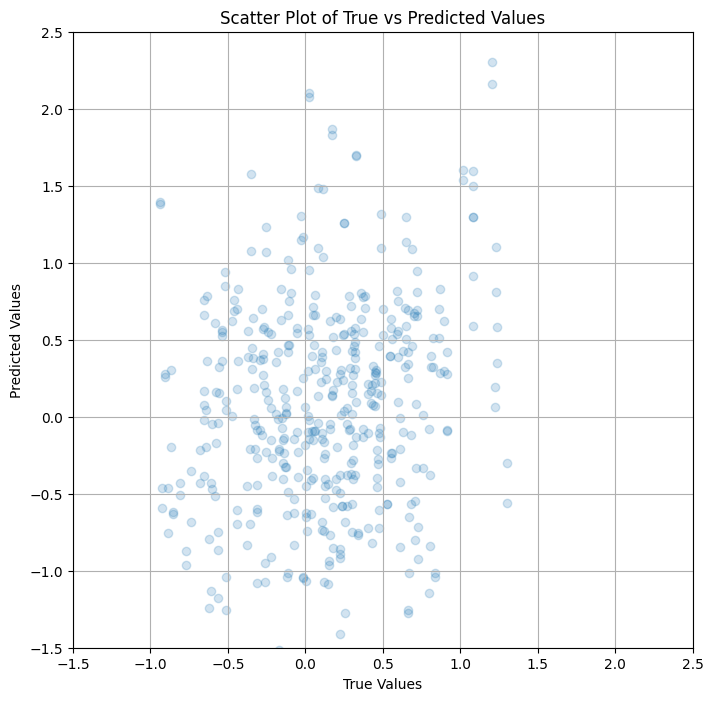

In [112]:
x = bigboss['true']
y=bigboss['pred']
plt.figure(figsize=(8, 8))
plt.axis([-1.5, 2.5, -1.5, 2.5])
plt.scatter(x, y, alpha=0.2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')
plt.grid(True)
plt.show()
# pearson_spearman(x, y)

In [113]:
pred_df = pd.read_csv('../model_outputs/1c8n0ubm/activations_macaque_VAL.csv', header=None)
val2_df = pd.read_csv('../splits/old_val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True)

val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, sep="\t").rename(columns={0:'old_mac_chr', 3:'mac_peak', 4:'mac_real'})

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])
mac_all = pd.concat([doubled_val2_df, pred_val2_df], axis=1).rename(columns={0:'mac_pred'})
mac_all

,old_mac_chr,1,2,mac_peak,mac_real,mac_pred
0,chr8,11517763,11518263,peak73028,1.586479,1.871220
1,chr8,11517763,11518263,peak73028,1.586479,1.926895
2,chr5,145920119,145920619,peak64958,1.612966,2.398169
3,chr5,145920119,145920619,peak64958,1.612966,2.457575
4,chr14,119309849,119310349,peak58554,1.615178,2.310427
...,...,...,...,...,...,...
469,chr8,33228069,33228569,peak2329,3.301533,1.286887
470,chr14,95163729,95164229,peak729,3.341600,0.505915
471,chr14,95163729,95164229,peak729,3.341600,0.326106
472,chr2,158906843,158907343,peak2402,3.357920,1.306699


In [114]:
merged_mac = peaks.merge(mac_all, how='left', left_on=3, right_on='mac_peak')
nan = merged_mac[merged_mac.isna().any(axis=1)]
m_mac_old = merged_mac[~merged_mac[3].isin(nan[3])].reset_index(drop=True)
m_mouse_old = merged_mouse_pred[~merged_mouse_pred[13].isin(nan[13])].reset_index(drop=True)
m_mouse_old = m_mouse_old.rename(columns={'real':'mouse_real', '3_y':"mouse_peak", 'pred':'mouse_pred'})
old_bigboss =pd.concat([m_mac_old, m_mouse_old], axis=1)
old_bigboss

,3,13,old_mac_chr,1,2,mac_peak,mac_real,mac_pred,3_x,13,chr,1,2,mouse_peak,mouse_real,mouse_pred
0,peak24458,peak20464,chr14,96572066.0,96572566.0,peak24458,2.599997,0.506959,peak24458,peak20464,chr9,6668368,6668868,peak20464,2.585922,2.194212
1,peak24458,peak20464,chr14,96572066.0,96572566.0,peak24458,2.599997,0.174012,peak24458,peak20464,chr9,6668368,6668868,peak20464,2.585922,2.695946
2,peak64793,peak20478,chr14,95561698.0,95562198.0,peak64793,1.832866,2.351342,peak64793,peak20478,chr9,7603249,7603749,peak20478,3.056738,1.512801
3,peak64793,peak20478,chr14,95561698.0,95562198.0,peak64793,1.832866,1.913561,peak64793,peak20478,chr9,7603249,7603749,peak20478,3.056738,1.551996
4,peak729,peak20484,chr14,95163729.0,95164229.0,peak729,3.341600,0.505915,peak729,peak20484,chr9,7914454,7914954,peak20484,2.898484,1.338570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,peak39634,peak20428,chr1,211201073.0,211201573.0,peak39634,1.862402,1.156095,peak39634,peak20428,chr8,126807188,126807688,peak20428,2.167768,1.538240
428,peak14712,peak20441,chr1,211365516.0,211366016.0,peak14712,2.881346,2.272215,peak14712,peak20441,chr8,126920787,126921287,peak20441,2.225973,1.752460
429,peak14712,peak20441,chr1,211365516.0,211366016.0,peak14712,2.881346,2.328917,peak14712,peak20441,chr8,126920787,126921287,peak20441,2.225973,1.761606
430,peak11504,peak20442,chr9,35000894.0,35001394.0,peak11504,3.076468,1.801072,peak11504,peak20442,chr8,127104567,127105067,peak20442,2.425371,1.908128


In [115]:
old_bigboss['true'] = old_bigboss['mouse_real']-old_bigboss['mac_real']
old_bigboss['pred'] = old_bigboss['mouse_pred']-old_bigboss['mac_pred']
old_bigboss

,3,13,old_mac_chr,1,2,mac_peak,mac_real,mac_pred,3_x,13,chr,1,2,mouse_peak,mouse_real,mouse_pred,true,pred
0,peak24458,peak20464,chr14,96572066.0,96572566.0,peak24458,2.599997,0.506959,peak24458,peak20464,chr9,6668368,6668868,peak20464,2.585922,2.194212,-0.014075,1.687254
1,peak24458,peak20464,chr14,96572066.0,96572566.0,peak24458,2.599997,0.174012,peak24458,peak20464,chr9,6668368,6668868,peak20464,2.585922,2.695946,-0.014075,2.521934
2,peak64793,peak20478,chr14,95561698.0,95562198.0,peak64793,1.832866,2.351342,peak64793,peak20478,chr9,7603249,7603749,peak20478,3.056738,1.512801,1.223872,-0.838541
3,peak64793,peak20478,chr14,95561698.0,95562198.0,peak64793,1.832866,1.913561,peak64793,peak20478,chr9,7603249,7603749,peak20478,3.056738,1.551996,1.223872,-0.361565
4,peak729,peak20484,chr14,95163729.0,95164229.0,peak729,3.341600,0.505915,peak729,peak20484,chr9,7914454,7914954,peak20484,2.898484,1.338570,-0.443116,0.832655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,peak39634,peak20428,chr1,211201073.0,211201573.0,peak39634,1.862402,1.156095,peak39634,peak20428,chr8,126807188,126807688,peak20428,2.167768,1.538240,0.305366,0.382145
428,peak14712,peak20441,chr1,211365516.0,211366016.0,peak14712,2.881346,2.272215,peak14712,peak20441,chr8,126920787,126921287,peak20441,2.225973,1.752460,-0.655373,-0.519755
429,peak14712,peak20441,chr1,211365516.0,211366016.0,peak14712,2.881346,2.328917,peak14712,peak20441,chr8,126920787,126921287,peak20441,2.225973,1.761606,-0.655373,-0.567312
430,peak11504,peak20442,chr9,35000894.0,35001394.0,peak11504,3.076468,1.801072,peak11504,peak20442,chr8,127104567,127105067,peak20442,2.425371,1.908128,-0.651097,0.107056


In [116]:
same_sign = np.sign(old_bigboss['true']) == np.sign(old_bigboss['pred'])
same_sign.sum()

219

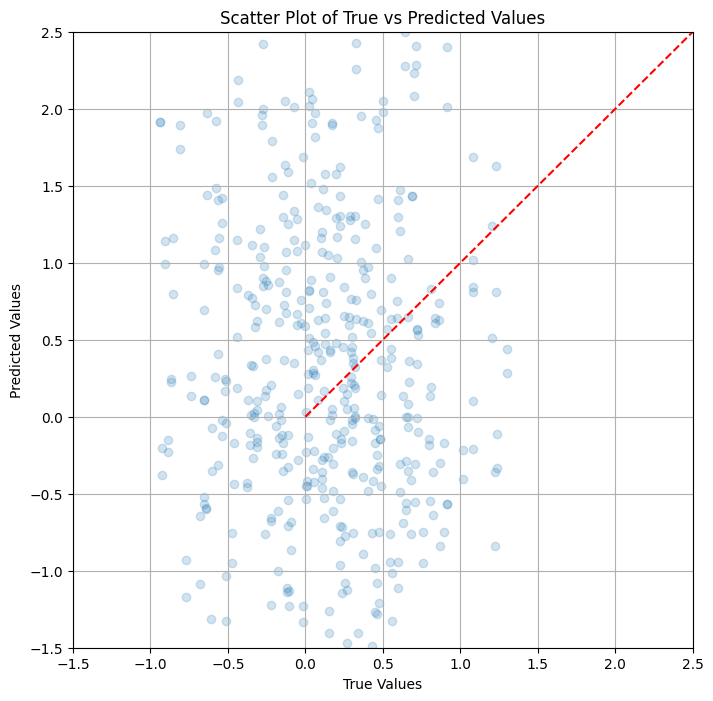

Pearson correlation coefficient: -0.0205, p-value: 0.6709
Spearman correlation coefficient: -0.0434, p-value: 0.3687


In [117]:
x = old_bigboss['true']
y=old_bigboss['pred']

plt.figure(figsize=(8, 8))
plt.axis([-1.5, 2.5, -1.5, 2.5])
plt.scatter(x, y, alpha=0.2)
plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')
plt.grid(True)
plt.show()
pearson_spearman(x, y)

In [118]:
def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

pearson_spearman(old_bigboss['true'], old_bigboss['pred'])
pearson_spearman(bigboss['true'], bigboss['pred'])

Pearson correlation coefficient: -0.0205, p-value: 0.6709
Spearman correlation coefficient: -0.0434, p-value: 0.3687
Pearson correlation coefficient: 0.1846, p-value: 0.0001139
Spearman correlation coefficient: 0.1600, p-value: 0.0008467


In [119]:
bigboss

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred,mac_peak,chr,1,2,mac_true,mac_pred,true,pred
0,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.194212,peak24458,chr14,96572066.0,96572566.0,2.599997,1.943228,-0.014075,0.250984
1,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.695946,peak24458,chr14,96572066.0,96572566.0,2.599997,1.525735,-0.014075,1.170211
2,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.512801,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875,1.223872,0.062926
3,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.551996,peak64793,chr14,95561698.0,95562198.0,1.832866,1.359642,1.223872,0.192354
4,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233,-0.443116,-0.695663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,peak39634,peak20428,chr8,126807188,126807688,2.167768,1.538240,peak39634,chr1,211201073.0,211201573.0,1.862402,1.941627,0.305366,-0.403387
428,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.752460,peak14712,chr1,211365516.0,211366016.0,2.881346,1.678361,-0.655373,0.074099
429,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.761606,peak14712,chr1,211365516.0,211366016.0,2.881346,2.146022,-0.655373,-0.384416
430,peak11504,peak20442,chr8,127104567,127105067,2.425371,1.908128,peak11504,chr9,35000894.0,35001394.0,3.076468,1.743001,-0.651097,0.165127


In [120]:
mouse_av = (bigboss.loc[::2, 'mouse_pred'].values + bigboss.loc[1::2, 'mouse_pred'].values) / 2
mac_av = (bigboss.loc[::2, 'mac_pred'].values + bigboss.loc[1::2, 'mac_pred'].values) / 2

# Add the averages back to the DataFrame as a new column
bigboss.loc[::2, 'mouse_pred_avg'] = mouse_av  # Assign averages to even indices only
bigboss.loc[::2, 'mac_pred_avg'] = mac_av 
bigboss.loc[::2]

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred,mac_peak,chr,1,2,mac_true,mac_pred,true,pred,mouse_pred_avg,mac_pred_avg
0,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.194212,peak24458,chr14,96572066.0,96572566.0,2.599997,1.943228,-0.014075,0.250984,2.445079,1.734481
2,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.512801,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875,1.223872,0.062926,1.532399,1.404759
4,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233,-0.443116,-0.695663,1.404920,2.055736
6,peak30058,peak19418,chr8,8733771,8734271,2.725534,2.192239,peak30058,chr17,88328251.0,88328751.0,2.354561,1.639219,0.370973,0.553019,2.264222,1.599389
8,peak5261,peak19424,chr8,8992710,8993210,2.241024,2.109853,peak5261,chr17,88617021.0,88617521.0,3.128443,2.569926,-0.887419,-0.460074,1.993603,2.601543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,peak23956,peak20423,chr8,126666384,126666884,2.516322,1.612648,peak23956,chr1,211003190.0,211003690.0,1.920681,1.221972,0.595640,0.390677,1.779239,1.208158
424,peak24665,peak20427,chr8,126774694,126775194,2.067716,1.270335,peak24665,chr1,211154391.0,211154891.0,2.175861,0.801663,-0.108145,0.468673,1.281822,0.671785
426,peak39634,peak20428,chr8,126807188,126807688,2.167768,1.502779,peak39634,chr1,211201073.0,211201573.0,1.862402,1.785736,0.305366,-0.282957,1.520510,1.863682
428,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.752460,peak14712,chr1,211365516.0,211366016.0,2.881346,1.678361,-0.655373,0.074099,1.757033,1.912192


In [121]:
bigboss['avg_true'] = bigboss['mouse_true']-bigboss['mac_true']
bigboss['avg_pred'] = bigboss['mouse_pred_avg']-bigboss['mac_pred_avg']
bigboss

# old_bigboss['avg_true'] = old_bigboss['mouse_real']-old_bigboss['mac_real']
# old_bigboss['avg_pred'] = old_bigboss['mouse_pred_avg']-old_bigboss['mac_pred_avg']
# old_bigboss

same_sign = np.sign(bigboss.loc[::2]['avg_true']) == np.sign(bigboss.loc[::2]['avg_pred'])
same_sign.sum()

123

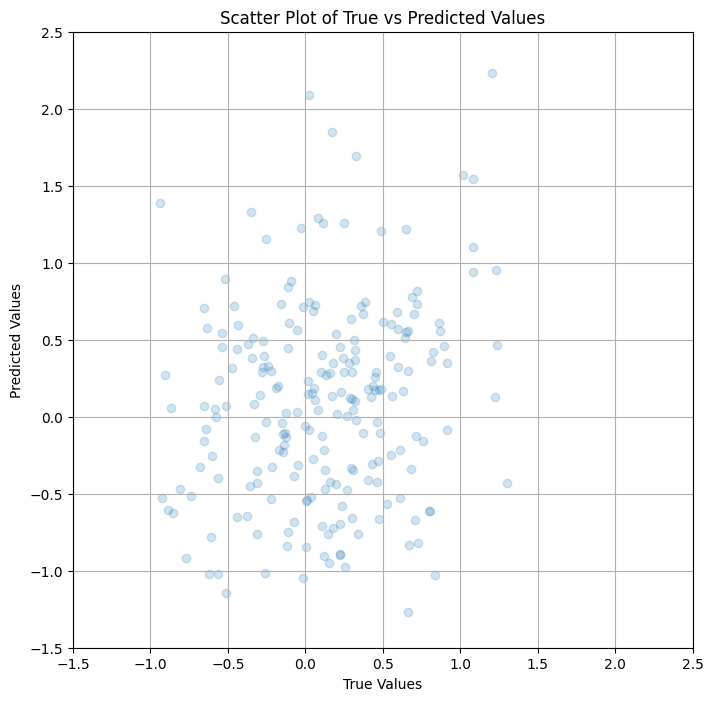

Pearson correlation coefficient: 0.1918, p-value: 0.004674
Spearman correlation coefficient: 0.1677, p-value: 0.0136


In [122]:
x = bigboss['avg_true']
y=bigboss['avg_pred']


plt.figure(figsize=(8, 8))
plt.axis([-1.5, 2.5, -1.5, 2.5])
plt.scatter(x, y, alpha=0.2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')
plt.grid(True)
plt.show()
pearson_spearman(x[::2], y[::2])

In [123]:
bigboss

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred,mac_peak,chr,1,2,mac_true,mac_pred,true,pred,mouse_pred_avg,mac_pred_avg,avg_true,avg_pred
0,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.194212,peak24458,chr14,96572066.0,96572566.0,2.599997,1.943228,-0.014075,0.250984,2.445079,1.734481,-0.014075,0.710598
1,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.695946,peak24458,chr14,96572066.0,96572566.0,2.599997,1.525735,-0.014075,1.170211,NaN,NaN,-0.014075,NaN
2,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.512801,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875,1.223872,0.062926,1.532399,1.404759,1.223872,0.127640
3,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.551996,peak64793,chr14,95561698.0,95562198.0,1.832866,1.359642,1.223872,0.192354,NaN,NaN,1.223872,NaN
4,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233,-0.443116,-0.695663,1.404920,2.055736,-0.443116,-0.650816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,peak39634,peak20428,chr8,126807188,126807688,2.167768,1.538240,peak39634,chr1,211201073.0,211201573.0,1.862402,1.941627,0.305366,-0.403387,NaN,NaN,0.305366,NaN
428,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.752460,peak14712,chr1,211365516.0,211366016.0,2.881346,1.678361,-0.655373,0.074099,1.757033,1.912192,-0.655373,-0.155158
429,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.761606,peak14712,chr1,211365516.0,211366016.0,2.881346,2.146022,-0.655373,-0.384416,NaN,NaN,-0.655373,NaN
430,peak11504,peak20442,chr8,127104567,127105067,2.425371,1.908128,peak11504,chr9,35000894.0,35001394.0,3.076468,1.743001,-0.651097,0.165127,1.858614,1.786706,-0.651097,0.071908


In [134]:
diff_mouse = bigboss['mouse_pred'].diff().abs().shift(-1)
diff_mac = bigboss['mac_pred'].diff().abs().shift(-1)

# Create mask where both column A and B differences are <= 0.5
mask = (diff_mouse <= 0.5) & (diff_mac <= 0.5)

# Keep only rows where the pair satisfies the condition
filtered_bb = bigboss.iloc[[i for i in range(0, len(bigboss), 2) if mask[i]] + 
                      [i+1 for i in range(0, len(bigboss)-1, 2) if mask[i]]].reset_index(drop=True)
filtered_bb

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred,mac_peak,chr,1,2,mac_true,mac_pred,true,pred,mouse_pred_avg,mac_pred_avg,avg_true,avg_pred
0,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.512801,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875,1.223872,0.062926,1.532399,1.404759,1.223872,0.127640
1,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233,-0.443116,-0.695663,1.404920,2.055736,-0.443116,-0.650816
2,peak30058,peak19418,chr8,8733771,8734271,2.725534,2.192239,peak30058,chr17,88328251.0,88328751.0,2.354561,1.639219,0.370973,0.553019,2.264222,1.599389,0.370973,0.664832
3,peak5261,peak19424,chr8,8992710,8993210,2.241024,2.109853,peak5261,chr17,88617021.0,88617521.0,3.128443,2.569926,-0.887419,-0.460074,1.993603,2.601543,-0.887419,-0.607940
4,peak12483,peak19431,chr8,9227624,9228124,3.142397,1.789128,peak12483,chr17,88914520.0,88915020.0,2.873745,2.366157,0.268652,-0.577029,1.888670,2.367047,0.268652,-0.478377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,peak23956,peak20423,chr8,126666384,126666884,2.516322,1.945830,peak23956,chr1,211003190.0,211003690.0,1.920681,1.194343,0.595640,0.751487,NaN,NaN,0.595640,NaN
384,peak24665,peak20427,chr8,126774694,126775194,2.067716,1.293308,peak24665,chr1,211154391.0,211154891.0,2.175861,0.541907,-0.108145,0.751401,NaN,NaN,-0.108145,NaN
385,peak39634,peak20428,chr8,126807188,126807688,2.167768,1.538240,peak39634,chr1,211201073.0,211201573.0,1.862402,1.941627,0.305366,-0.403387,NaN,NaN,0.305366,NaN
386,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.761606,peak14712,chr1,211365516.0,211366016.0,2.881346,2.146022,-0.655373,-0.384416,NaN,NaN,-0.655373,NaN


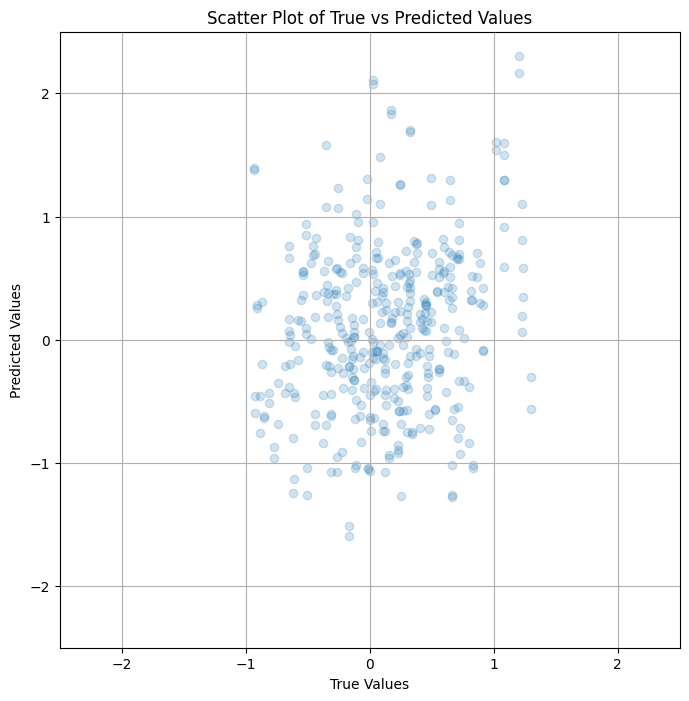

Pearson correlation coefficient: 0.2002, p-value: 7.168e-05
Spearman correlation coefficient: 0.1744, p-value: 0.0005583


In [138]:
x = filtered_bb['mouse_true']-filtered_bb['mac_true']
y = filtered_bb['mouse_pred']-filtered_bb['mac_pred']
plt.figure(figsize=(8, 8))
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.scatter(x, y, alpha=0.2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')
plt.grid(True)
plt.show()
pearson_spearman(x, y)

In [126]:
mask = (diff_mouse <=4) & (diff_mac <=4)

# Keep only rows where the pair satisfies the condition
filtered_bb = bigboss.iloc[[i for i in range(0, len(bigboss), 2) if mask[i]] + 
                      [i+1 for i in range(0, len(bigboss)-1, 2) if mask[i]]].reset_index(drop=True)
filtered_bb

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred,mac_peak,chr,1,2,mac_true,mac_pred,true,pred,mouse_pred_avg,mac_pred_avg,avg_true,avg_pred
0,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.194212,peak24458,chr14,96572066.0,96572566.0,2.599997,1.943228,-0.014075,0.250984,2.445079,1.734481,-0.014075,0.710598
1,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.512801,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875,1.223872,0.062926,1.532399,1.404759,1.223872,0.127640
2,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233,-0.443116,-0.695663,1.404920,2.055736,-0.443116,-0.650816
3,peak30058,peak19418,chr8,8733771,8734271,2.725534,2.192239,peak30058,chr17,88328251.0,88328751.0,2.354561,1.639219,0.370973,0.553019,2.264222,1.599389,0.370973,0.664832
4,peak5261,peak19424,chr8,8992710,8993210,2.241024,2.109853,peak5261,chr17,88617021.0,88617521.0,3.128443,2.569926,-0.887419,-0.460074,1.993603,2.601543,-0.887419,-0.607940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,peak23956,peak20423,chr8,126666384,126666884,2.516322,1.945830,peak23956,chr1,211003190.0,211003690.0,1.920681,1.194343,0.595640,0.751487,NaN,NaN,0.595640,NaN
428,peak24665,peak20427,chr8,126774694,126775194,2.067716,1.293308,peak24665,chr1,211154391.0,211154891.0,2.175861,0.541907,-0.108145,0.751401,NaN,NaN,-0.108145,NaN
429,peak39634,peak20428,chr8,126807188,126807688,2.167768,1.538240,peak39634,chr1,211201073.0,211201573.0,1.862402,1.941627,0.305366,-0.403387,NaN,NaN,0.305366,NaN
430,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.761606,peak14712,chr1,211365516.0,211366016.0,2.881346,2.146022,-0.655373,-0.384416,NaN,NaN,-0.655373,NaN


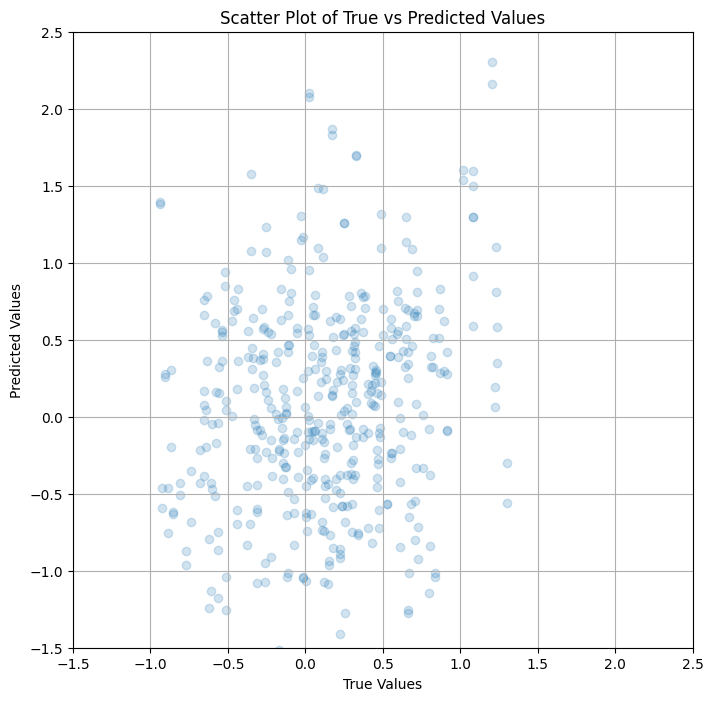

Pearson correlation coefficient: 0.1846, p-value: 0.0001139
Spearman correlation coefficient: 0.1600, p-value: 0.0008467


In [127]:
x = filtered_bb['mouse_true']-filtered_bb['mac_true']
y = filtered_bb['mouse_pred']-filtered_bb['mac_pred']
plt.figure(figsize=(8, 8))
plt.axis([-1.5, 2.5, -1.5, 2.5])
plt.scatter(x, y, alpha=0.2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')
plt.grid(True)
plt.show()
pearson_spearman(x, y)

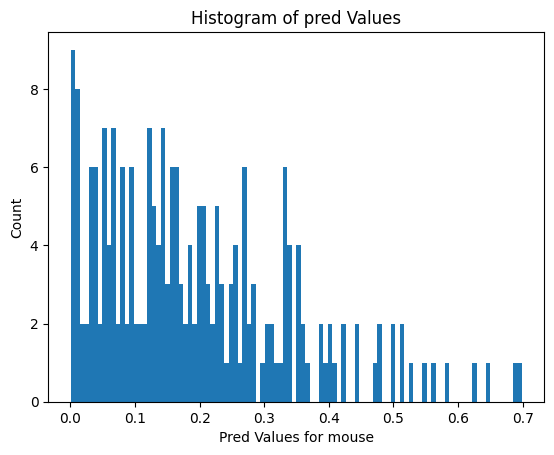

In [128]:
diff_mouse = bigboss['mouse_pred'].diff().abs().shift(-1)

def histogram(pred_df, name):
    plt.hist(pred_df, bins=100)
    plt.xlabel(f'Pred Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of pred Values')
    plt.show()

histogram(diff_mouse[::2], 'mouse')

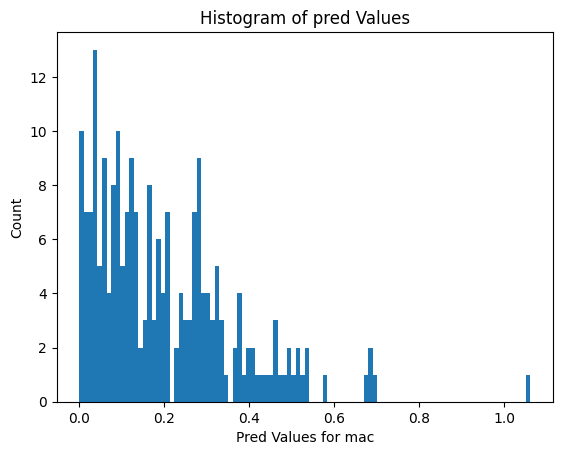

In [129]:
diff_mac = bigboss['mac_pred'].diff().abs().shift(-1)

def histogram(pred_df, name):
    plt.hist(pred_df, bins=100)
    plt.xlabel(f'Pred Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of pred Values')
    plt.show()

histogram(diff_mac[::2], 'mac')

In [130]:
bigboss

,3_x,mouse_peak,chr,1,2,mouse_true,mouse_pred,mac_peak,chr,1,2,mac_true,mac_pred,true,pred,mouse_pred_avg,mac_pred_avg,avg_true,avg_pred
0,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.194212,peak24458,chr14,96572066.0,96572566.0,2.599997,1.943228,-0.014075,0.250984,2.445079,1.734481,-0.014075,0.710598
1,peak24458,peak20464,chr9,6668368,6668868,2.585922,2.695946,peak24458,chr14,96572066.0,96572566.0,2.599997,1.525735,-0.014075,1.170211,NaN,NaN,-0.014075,NaN
2,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.512801,peak64793,chr14,95561698.0,95562198.0,1.832866,1.449875,1.223872,0.062926,1.532399,1.404759,1.223872,0.127640
3,peak64793,peak20478,chr9,7603249,7603749,3.056738,1.551996,peak64793,chr14,95561698.0,95562198.0,1.832866,1.359642,1.223872,0.192354,NaN,NaN,1.223872,NaN
4,peak729,peak20484,chr9,7914454,7914954,2.898484,1.338570,peak729,chr14,95163729.0,95164229.0,3.341600,2.034233,-0.443116,-0.695663,1.404920,2.055736,-0.443116,-0.650816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,peak39634,peak20428,chr8,126807188,126807688,2.167768,1.538240,peak39634,chr1,211201073.0,211201573.0,1.862402,1.941627,0.305366,-0.403387,NaN,NaN,0.305366,NaN
428,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.752460,peak14712,chr1,211365516.0,211366016.0,2.881346,1.678361,-0.655373,0.074099,1.757033,1.912192,-0.655373,-0.155158
429,peak14712,peak20441,chr8,126920787,126921287,2.225973,1.761606,peak14712,chr1,211365516.0,211366016.0,2.881346,2.146022,-0.655373,-0.384416,NaN,NaN,-0.655373,NaN
430,peak11504,peak20442,chr8,127104567,127105067,2.425371,1.908128,peak11504,chr9,35000894.0,35001394.0,3.076468,1.743001,-0.651097,0.165127,1.858614,1.786706,-0.651097,0.071908
